In [ ]:
pip install catboost


In [ ]:
pip install scikit-learn


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
vi = pd.read_csv('VictimInfoDetails.csv')

In [3]:
vi.head()

,District_Name,UnitName,FIRNo,Year,Month,VictimName,age,Caste,Profession,Sex,...,PermanentCity,PermanentState,Nationality_Name,DOB,PersonType,InjuryType,Injury_Nature,Crime_No,Arr_ID,Victim_ID
0,Bagalkot,Amengad PS,0001/2016,2016,1,MAHxxxxxATH,14,Lingayath,NaN,FEMALE,...,Bagalkot,Karnataka,India,NaN,Deceased,Fatal,NaN,10470124520160001,2016000004,2016000002
1,Bagalkot,Amengad PS,0004/2016,2016,1,KRIxxxxxKAR,49,NaN,NaN,MALE,...,Bagalkot,Karnataka,India,NaN,Injured,Fatal,NaN,10470124520160004,2016000016,2016000006
2,Bagalkot,Amengad PS,0004/2016,2016,1,VINxxxxxKAR,0,NaN,NaN,MALE,...,Bagalkot,Karnataka,India,NaN,Injured,Fatal,NaN,10470124520160004,2016000015,2016000005
3,Bagalkot,Amengad PS,0004/2016,2016,1,RAGxxxxxKAR,34,NaN,NaN,MALE,...,Belagavi Dist,Karnataka,India,NaN,Injured,Fatal,NaN,10470124520160004,2016000013,2016000003
4,Bagalkot,Amengad PS,0004/2016,2016,1,SANxxxxxNNU,36,NaN,NaN,MALE,...,Belagavi Dist,Karnataka,India,NaN,Injured,Fatal,NaN,10470124520160004,2016000014,2016000004


In [4]:
vi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465783 entries, 0 to 1465782
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   District_Name     1465783 non-null  object
 1   UnitName          1465783 non-null  object
 2   FIRNo             1465783 non-null  object
 3   Year              1465783 non-null  int64 
 4   Month             1465783 non-null  int64 
 5   VictimName        1464689 non-null  object
 6   age               1465783 non-null  int64 
 7   Caste             1277136 non-null  object
 8   Profession        1285055 non-null  object
 9   Sex               1465556 non-null  object
 10  PresentAddress    1465783 non-null  object
 11  PresentCity       1465678 non-null  object
 12  PresentState      1464835 non-null  object
 13  PermanentAddress  1465783 non-null  object
 14  PermanentCity     1465678 non-null  object
 15  PermanentState    1464835 non-null  object
 16  Nationality_Name  

In [5]:
vi.shape

(1465783, 24)

In [6]:
vi.describe()

,Year,Month,age,Crime_No,Arr_ID,Victim_ID
count,1.465783e+06,1.465783e+06,1.465783e+06,1.465783e+06,1.465783e+06,1.465783e+06
mean,2.019913e+03,6.351394e+00,3.433378e+01,1.053071e+16,2.020015e+09,2.020015e+09
std,2.378809e+00,3.510991e+00,1.660752e+01,2.180156e+14,2.348927e+06,2.348951e+06
min,2.016000e+03,1.000000e+00,-1.900000e+01,1.043801e+16,2.003000e+09,2.003000e+09
25%,2.018000e+03,3.000000e+00,2.400000e+01,1.044319e+16,2.018001e+09,2.018000e+09
50%,2.020000e+03,6.000000e+00,3.300000e+01,1.045416e+16,2.020001e+09,2.020000e+09
75%,2.022000e+03,9.000000e+00,4.500000e+01,1.046411e+16,2.022001e+09,2.022000e+09
max,2.024000e+03,1.200000e+01,6.650000e+02,1.044322e+17,2.024001e+09,2.024000e+09


In [7]:
columns_to_drop =['FIRNo', 'VictimName', 'Caste', 'Profession','PresentAddress','PresentState','PermanentAddress','PermanentCity','PermanentState','Nationality_Name','DOB','Crime_No','Arr_ID','Victim_ID', 'Injury_Nature']
vi.drop(columns_to_drop, axis=1, inplace=True)

In [8]:
vi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465783 entries, 0 to 1465782
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   District_Name  1465783 non-null  object
 1   UnitName       1465783 non-null  object
 2   Year           1465783 non-null  int64 
 3   Month          1465783 non-null  int64 
 4   age            1465783 non-null  int64 
 5   Sex            1465556 non-null  object
 6   PresentCity    1465678 non-null  object
 7   PersonType     1465783 non-null  object
 8   InjuryType     1009647 non-null  object
dtypes: int64(3), object(6)
memory usage: 100.6+ MB


In [9]:
print(vi['District_Name'].value_counts())
print(vi['UnitName'].value_counts())
print(vi['Year'].value_counts())
print(vi['Month'].value_counts())
print(vi['age'].value_counts())
print(vi['Sex'].value_counts())
print(vi['PresentCity'].value_counts())
print(vi['PersonType'].value_counts())
print(vi['InjuryType'].value_counts())

District_Name
Bengaluru City             293958
Tumakuru                    66879
Hassan                      64399
Belagavi Dist               60516
Bengaluru Dist              60000
Shivamogga                  58342
Mandya                      54474
Chitradurga                 46664
Mysuru Dist                 45672
Davanagere                  41943
Ramanagara                  40902
Bidar                       38112
Chikkamagaluru              33338
Uttara Kannada              32536
Kalaburagi                  31711
Vijayapur                   31330
Chickballapura              30938
Mysuru City                 30534
Haveri                      29440
Bagalkot                    27101
Raichur                     27057
Mangaluru City              26712
Udupi                       25824
Kolar                       24810
Vijayanagara                22018
Dakshina Kannada            21942
Ballari                     21055
Koppal                      20702
Hubballi Dharwad City       20026


In [10]:
vi = vi[vi['InjuryType'] != 'Not Applicable']

In [12]:
print(vi['InjuryType'].value_counts())

InjuryType
Fatal       349090
Minor       315373
Grievous    122253
Abused        1683
Name: count, dtype: int64


In [13]:
vi = vi[vi['PersonType'] != 'Others']

In [14]:
vi.shape

(1213327, 9)

In [15]:
print(vi['age'].max())

665


In [16]:
age = vi['age']

q1 = np.percentile(age, 25)
q3 = np.percentile(age, 75)

# Calculate IQR (Interquartile Range)
iqr = q3 - q1

# Calculate lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Find outliers
outliers = [x for x in age if x < lower_bound or x > upper_bound]
print("Outliers using IQR method:", outliers)

Outliers using IQR method: [80, 90, 83, 82, 95, 80, 82, 80, 80, 83, 79, 86, 85, 94, 80, 83, 86, 84, 80, 83, 80, 82, 80, 80, 80, 79, 80, 80, 80, 80, 86, 80, 85, 82, 80, 80, 82, 85, 80, 82, 84, 81, 80, 85, 80, 85, 85, 94, 80, 83, 86, 80, 85, 87, 80, 80, 82, 87, 80, 80, 80, 94, 85, 80, 80, 85, 80, 79, 105, 81, 79, 80, 79, 80, 79, 80, 80, 85, 92, 85, 95, 87, 83, 84, 85, 79, 86, 80, 80, 86, 84, 84, 102, 80, 85, 80, 82, 80, 82, 79, 80, 80, 80, 80, 80, 85, 93, 101, 80, 80, 80, 80, 82, 85, 82, 80, 80, 80, 84, 83, 86, 85, 80, 80, 90, 80, 80, 85, 81, 85, 80, 80, 81, 81, 80, 81, 85, 85, 84, 80, 81, 80, 80, 84, 80, 80, 80, 84, 84, 85, 85, 83, 85, 87, 85, 80, 80, 85, 85, 83, 80, 84, 85, 80, 86, 86, 89, 79, 80, 80, 80, 80, 82, 86, 84, 82, 82, 80, 91, 79, 85, 84, 80, 85, 79, 85, 98, 85, 83, 80, 82, 84, 80, 86, 80, 79, 80, 80, 83, 81, 87, 80, 80, 80, 85, 81, 84, 79, 83, 87, 85, 80, 80, 80, 90, 79, 84, 82, 82, 80, 86, 79, 82, 80, 82, 84, 85, 85, 80, 83, 80, 80, 80, 80, 80, 85, 82, 80, 80, 87, 80, 80, 8

In [17]:
# remoning outliers:
vi = vi[(vi['age'] <= 75) & (vi['age'] >= 18)]

In [18]:
vi.shape

(1047199, 9)

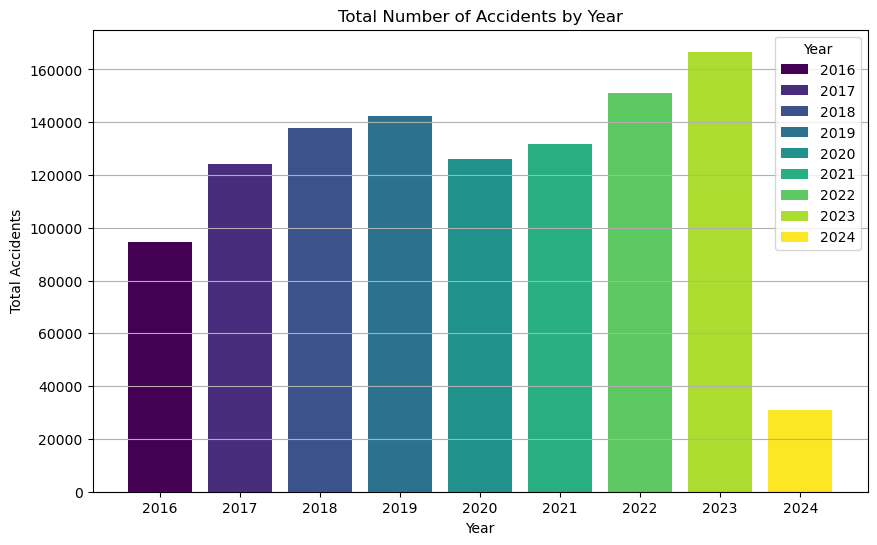

In [20]:
# Year data
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

# Total number of accidents for each year
accidents = [94495, 124169, 137840, 142355, 126223, 131634, 151117, 166710, 30960]

# Define a color palette for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))  # Using the Viridis colormap

# Plot the graph
plt.figure(figsize=(10, 6))
bars = plt.bar(years, accidents, color=colors)

# Add a color legend for each bar
for bar, year in zip(bars, years):
    bar.set_label(year)

plt.legend(title='Year')
plt.title('Total Number of Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.xticks(years)  # Ensure all years are displayed on the x-axis
plt.grid(axis='y')  # Show gridlines only on the y-axis
plt.show()

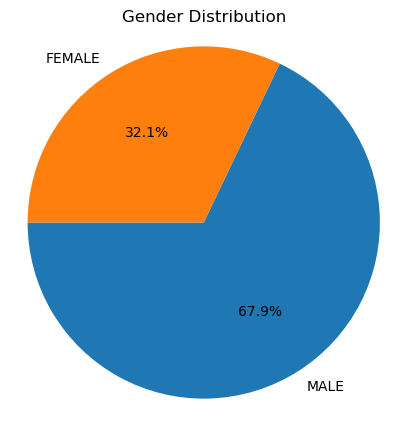

In [21]:
# Sex data
sex_labels = ['MALE', 'FEMALE']
sex_counts = [750432, 354699]

# Define colors for each sex
colors = ['#1f77b4', '#ff7f0e']

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sex_counts, labels=sex_labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

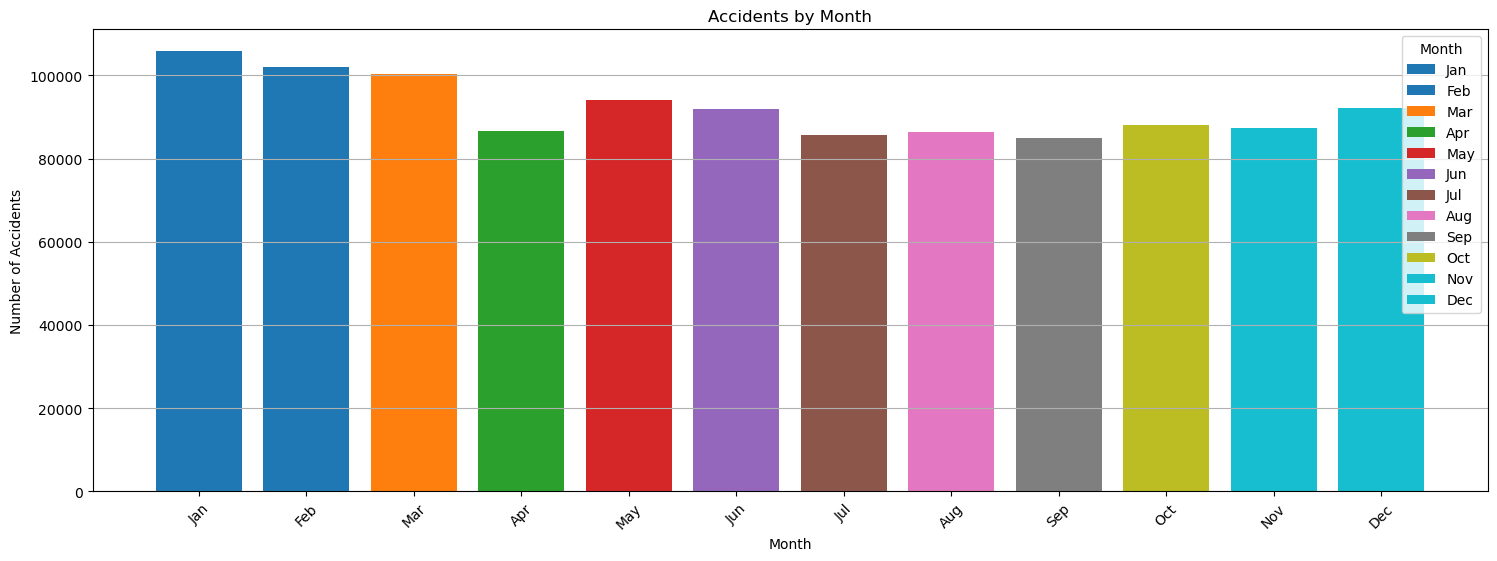

In [22]:
# Month data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
accidents = [105766, 101926, 100267, 86702, 94149, 92033, 85684, 86468, 84948, 88002, 87442, 92116]

# Define a color palette for the bars
colors = plt.cm.tab10(np.linspace(0, 1, len(months)))  # Using the Tab10 colormap

# Plot the graph
plt.figure(figsize=(18, 6))
bars = plt.bar(months, accidents, color=colors)

# Add a color legend for each bar
for bar, month in zip(bars, months):
    bar.set_label(month)

plt.legend(title='Month')
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Show gridlines only on the y-axis
plt.show()

In [23]:
# RANDOM FOREST

In [24]:
# Getting ready injury type column for training 
vi_cleaned = vi.dropna(subset=['InjuryType'])

In [26]:
# Encoding the target variable
label_encoder = LabelEncoder()
vi_cleaned['InjuryType'] = label_encoder.fit_transform(vi_cleaned['InjuryType'])


/tmp/ipykernel_31306/1970885165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vi_cleaned['InjuryType'] = label_encoder.fit_transform(vi_cleaned['InjuryType'])


In [25]:
# Filling up with the missing values!
vi_cleaned['Sex'].fillna(vi_cleaned['Sex'].mode()[0], inplace=True)
vi_cleaned['PresentCity'].fillna(vi_cleaned['PresentCity'].mode()[0], inplace=True)

/tmp/ipykernel_31306/1819270577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vi_cleaned['Sex'].fillna(vi_cleaned['Sex'].mode()[0], inplace=True)
/tmp/ipykernel_31306/1819270577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vi_cleaned['PresentCity'].fillna(vi_cleaned['PresentCity'].mode()[0], inplace=True)


In [27]:
# One-Hot Encode categorical features
categorical_features = ['District_Name', 'UnitName', 'Sex', 'PresentCity', 'PersonType']
vi_encoded = pd.get_dummies(vi_cleaned, columns=categorical_features)

In [28]:
# Define features (X) and target (y)
X = vi_encoded.drop(columns=['InjuryType'])
y = vi_encoded['InjuryType']

In [29]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [31]:
# Train the model
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [32]:
# Make predictions
y_pred = rf_clf.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.75


In [34]:
# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

      Abused       0.38      0.12      0.18       231
       Fatal       0.85      0.88      0.86     56011
    Grievous       0.50      0.40      0.44     22350
       Minor       0.72      0.76      0.74     55803

    accuracy                           0.75    134395
   macro avg       0.61      0.54      0.56    134395
weighted avg       0.74      0.75      0.74    134395



<Figure size 1000x700 with 0 Axes>

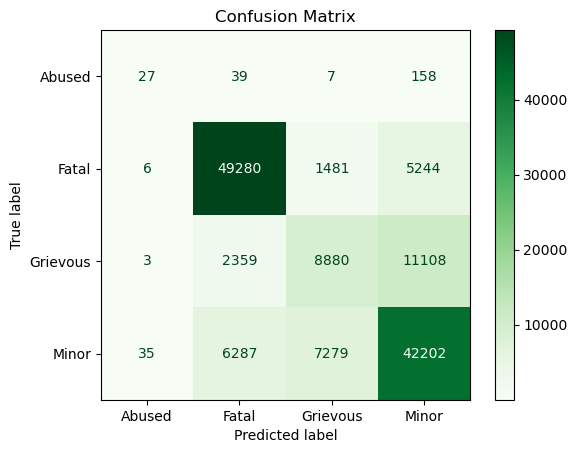

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
cm_display.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.show()

In [36]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

In [37]:
# Train the model
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [38]:
# Make predictions
y_pred = ada_clf.predict(X_test)

In [39]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


In [40]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

      Abused       0.14      0.09      0.11       231
       Fatal       0.82      0.85      0.83     56011
    Grievous       0.36      0.04      0.08     22350
       Minor       0.64      0.84      0.73     55803

    accuracy                           0.71    134395
   macro avg       0.49      0.46      0.44    134395
weighted avg       0.67      0.71      0.66    134395



<Figure size 1000x700 with 0 Axes>

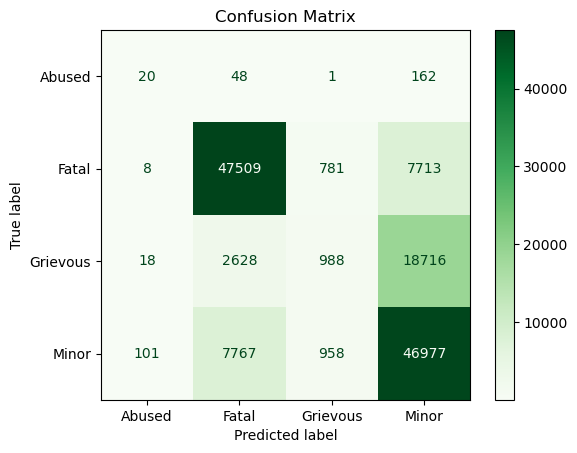

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
cm_display.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.show()

In [42]:
# Initialize LightGBM classifier
lgb_clf = lgb.LGBMClassifier(n_estimators=100, random_state=42)

In [43]:
# Train the model
lgb_clf.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2508
[LightGBM] [Info] Number of data points in the train set: 537578, number of used features: 1216
[LightGBM] [Info] Start training from score -6.343644
[LightGBM] [Info] Start training from score -0.876683
[LightGBM] [Info] Start training from score -1.799809
[LightGBM] [Info] Start training from score -0.875267


LGBMClassifier(random_state=42)

In [47]:
# Make predictions
y_pred = lgb_clf.predict(X_test)

In [48]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [49]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

      Abused       0.19      0.12      0.15       231
       Fatal       0.82      0.91      0.87     56011
    Grievous       0.60      0.24      0.34     22350
       Minor       0.71      0.80      0.75     55803

    accuracy                           0.75    134395
   macro avg       0.58      0.52      0.53    134395
weighted avg       0.74      0.75      0.73    134395



<Figure size 1000x700 with 0 Axes>

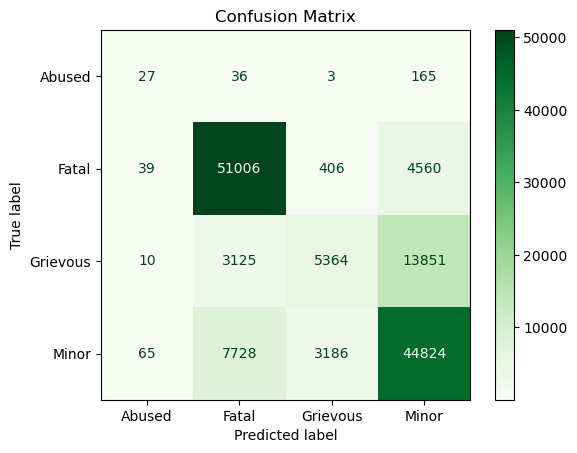

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
cm_display.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.show()

In [51]:
# Initialize CatBoost classifier
cat_clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=10, cat_features=categorical_features, verbose=0)

In [52]:
print(X_train.columns)

Index(['Year', 'Month', 'age', 'District_Name_Bagalkot',
       'District_Name_Ballari', 'District_Name_Belagavi City',
       'District_Name_Belagavi Dist', 'District_Name_Bengaluru City',
       'District_Name_Bengaluru Dist', 'District_Name_Bidar',
       ...
       'PersonType_Arrest', 'PersonType_Deceased', 'PersonType_Injured',
       'PersonType_Kidnapped', 'PersonType_Missing', 'PersonType_Rape',
       'PersonType_Surrender', 'PersonType_Unidentified Dead Body',
       'PersonType_Unidentified Person', 'PersonType_complainnant'],
      dtype='object', length=1718)


In [53]:
# Initialize CatBoostClassifier
cat_clf = CatBoostClassifier()

In [54]:
cat_clf.fit(X_train, y_train)

Learning rate set to 0.109037
0:	learn: 1.2336553	total: 112ms	remaining: 1m 51s
1:	learn: 1.1258328	total: 180ms	remaining: 1m 29s
2:	learn: 1.0440680	total: 246ms	remaining: 1m 21s
3:	learn: 0.9791322	total: 305ms	remaining: 1m 16s
4:	learn: 0.9265999	total: 367ms	remaining: 1m 13s
5:	learn: 0.8837397	total: 425ms	remaining: 1m 10s
6:	learn: 0.8471031	total: 477ms	remaining: 1m 7s
7:	learn: 0.8162747	total: 532ms	remaining: 1m 6s
8:	learn: 0.7895986	total: 596ms	remaining: 1m 5s
9:	learn: 0.7660409	total: 656ms	remaining: 1m 4s
10:	learn: 0.7460737	total: 708ms	remaining: 1m 3s
11:	learn: 0.7288892	total: 760ms	remaining: 1m 2s
12:	learn: 0.7137112	total: 818ms	remaining: 1m 2s
13:	learn: 0.7003500	total: 875ms	remaining: 1m 1s
14:	learn: 0.6886700	total: 928ms	remaining: 1m
15:	learn: 0.6788328	total: 975ms	remaining: 60s
16:	learn: 0.6694751	total: 1.03s	remaining: 59.6s
17:	learn: 0.6615114	total: 1.08s	remaining: 59.2s
18:	learn: 0.6549797	total: 1.13s	remaining: 58.4s
19:	learn:

In [55]:
# Make predictions
y_pred = cat_clf.predict(X_test)

In [56]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


In [57]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

      Abused       0.76      0.06      0.10       231
       Fatal       0.83      0.91      0.87     56011
    Grievous       0.62      0.25      0.36     22350
       Minor       0.71      0.81      0.76     55803

    accuracy                           0.76    134395
   macro avg       0.73      0.51      0.52    134395
weighted avg       0.74      0.76      0.74    134395



<Figure size 1000x700 with 0 Axes>

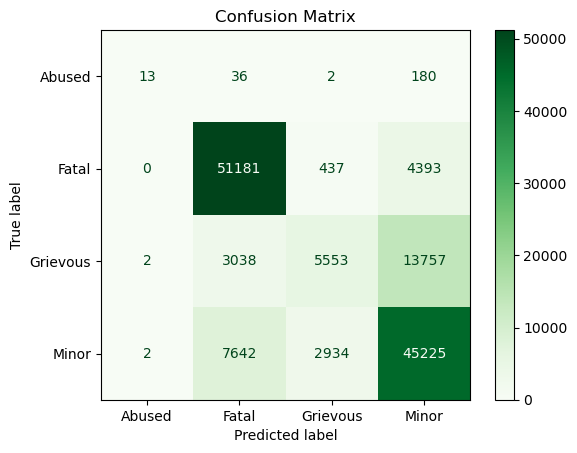

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
cm_display.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.show()